
Cluster centers (original scale):

Cluster 0:
Sepal length: 6.31
Sepal width: 2.90
Petal length: 4.97
Petal width: 1.70

Cluster 1:
Sepal length: 5.17
Sepal width: 3.63
Petal length: 1.49
Petal width: 0.27

Cluster 2:
Sepal length: 4.75
Sepal width: 2.90
Petal length: 1.76
Petal width: 0.35

Silhouette Score: 0.480
Adjusted Rand Index: 0.433


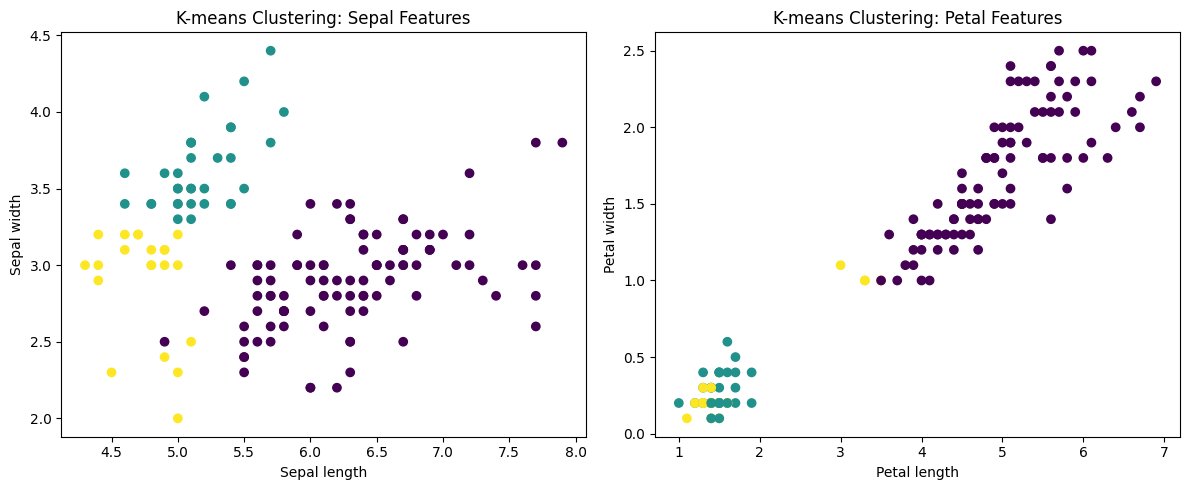

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualize the results using different feature combinations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Sepal length vs Sepal width
axes[0].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[0].set_title('K-means Clustering: Sepal Features')

# Plot 2: Petal length vs Petal width
axes[1].scatter(X[:, 2], X[:, 3], c=cluster_labels, cmap='viridis')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[1].set_title('K-means Clustering: Petal Features')

plt.tight_layout()

# Print cluster centers
print("\nCluster centers (original scale):")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
for i, center in enumerate(cluster_centers):
    print(f"\nCluster {i}:")
    for feature, value in zip(features, center):
        print(f"{feature}: {value:.2f}")

# Evaluate clustering performance
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")

# Compare with true labels
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, cluster_labels)
print(f"Adjusted Rand Index: {ari:.3f}")

plt.show()

Explained variance ratio:
PC1: 0.730
PC2: 0.229
PC3: 0.037
PC4: 0.005
Cumulative: 1.000

Cluster Centers:

Original Space:

Cluster 0:
Sepal length: 6.31
Sepal width: 2.90
Petal length: 4.97
Petal width: 1.70

Cluster 1:
Sepal length: 5.17
Sepal width: 3.63
Petal length: 1.49
Petal width: 0.27

Cluster 2:
Sepal length: 4.75
Sepal width: 2.90
Petal length: 1.76
Petal width: 0.35

PCA Space:

Cluster 0:
PC1: 1.17
PC2: -0.07

Cluster 1:
PC1: -2.22
PC2: 0.80

Cluster 2:
PC1: -1.88
PC2: -0.95

Performance Metrics:

Original Space:
Silhouette Score: 0.480
Adjusted Rand Index: 0.433

PCA Space (2 components):
Silhouette Score: 0.523
Adjusted Rand Index: 0.433


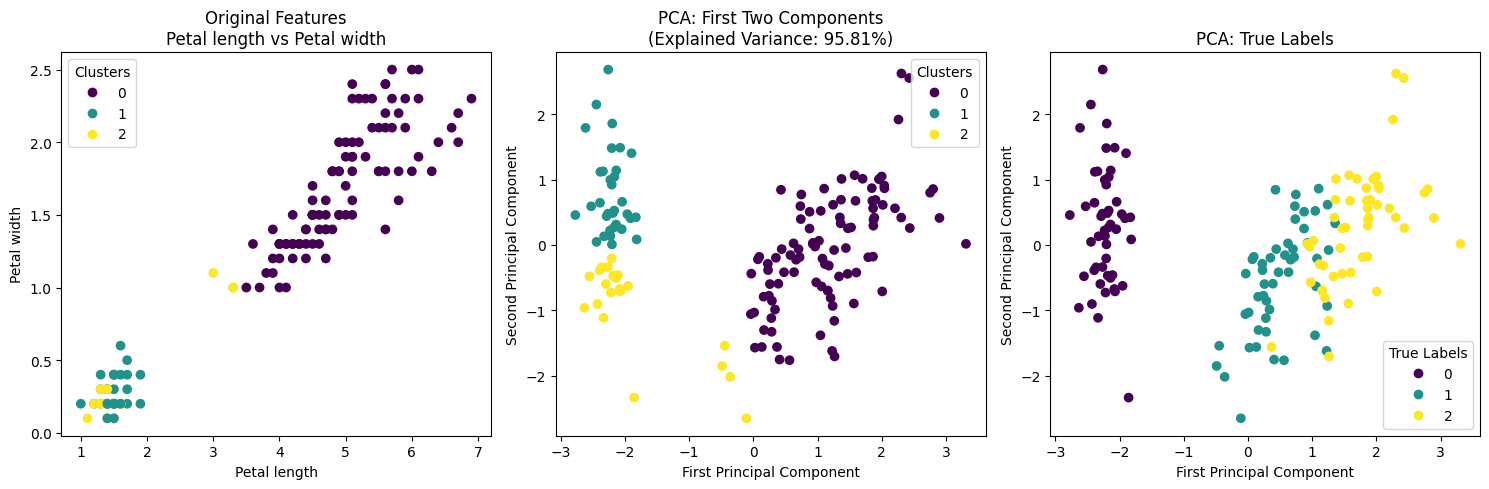

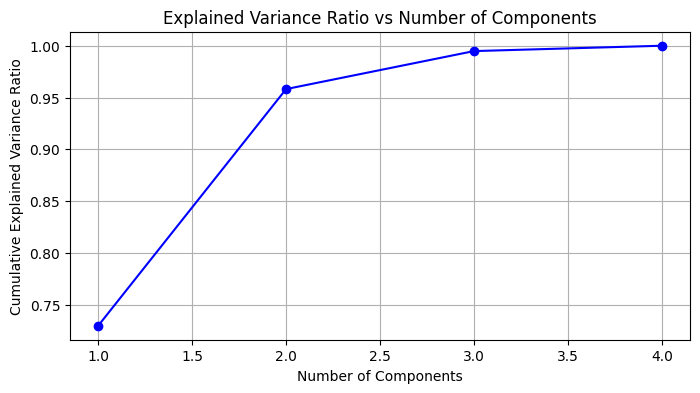

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained variance ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f}")
print(f"Cumulative: {np.sum(pca.explained_variance_ratio_):.3f}")

# Perform k-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Create subplots
fig = plt.figure(figsize=(15, 5))

# Plot 1: Original Features (Petal length vs Petal width)
ax1 = fig.add_subplot(131)
scatter1 = ax1.scatter(X[:, 2], X[:, 3], c=cluster_labels, cmap='viridis')
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')
ax1.set_title('Original Features\nPetal length vs Petal width')

# Plot 2: First two PCA components
ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('PCA: First Two Components\n' + 
              f'(Explained Variance: {pca.explained_variance_ratio_[:2].sum():.2%})')

# Plot 3: PCA components with true labels
ax3 = fig.add_subplot(133)
scatter3 = ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax3.set_xlabel('First Principal Component')
ax3.set_ylabel('Second Principal Component')
ax3.set_title('PCA: True Labels')

# Add legends
legend1 = ax1.legend(*scatter1.legend_elements(), title="Clusters")
legend2 = ax2.legend(*scatter2.legend_elements(), title="Clusters")
legend3 = ax3.legend(*scatter3.legend_elements(), title="True Labels")

plt.tight_layout()

# Visualize the cumulative explained variance ratio
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)

# Project cluster centers into PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# Print cluster centers in both original and PCA space
print("\nCluster Centers:")
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
print("\nOriginal Space:")
for i, center in enumerate(scaler.inverse_transform(kmeans.cluster_centers_)):
    print(f"\nCluster {i}:")
    for feature, value in zip(features, center):
        print(f"{feature}: {value:.2f}")

print("\nPCA Space:")
for i, center in enumerate(cluster_centers_pca):
    print(f"\nCluster {i}:")
    print(f"PC1: {center[0]:.2f}")
    print(f"PC2: {center[1]:.2f}")

# Calculate and print performance metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Calculate metrics in original space
silhouette_orig = silhouette_score(X_scaled, cluster_labels)
ari_orig = adjusted_rand_score(y, cluster_labels)

# Calculate metrics in PCA space (using first two components)
silhouette_pca = silhouette_score(X_pca[:, :2], cluster_labels)
ari_pca = adjusted_rand_score(y, cluster_labels)

print("\nPerformance Metrics:")
print(f"\nOriginal Space:")
print(f"Silhouette Score: {silhouette_orig:.3f}")
print(f"Adjusted Rand Index: {ari_orig:.3f}")
print(f"\nPCA Space (2 components):")
print(f"Silhouette Score: {silhouette_pca:.3f}")
print(f"Adjusted Rand Index: {ari_pca:.3f}")

plt.show()


PCA Explained Variance Ratio:
PC1: 0.730
PC2: 0.229
PC3: 0.037
PC4: 0.005
Cumulative: 1.000

Clustering Performance Metrics:

K-means Clustering:
Silhouette Score: 0.480
Adjusted Rand Index: 0.433

Hierarchical Clustering:
Silhouette Score: 0.447
Adjusted Rand Index: 0.615

K-means Cluster Statistics:

Cluster 0:
Size: 96
Mean values:
Sepal Length: 6.31 ± 0.62
Sepal Width: 2.90 ± 0.31
Petal Length: 4.97 ± 0.77
Petal Width: 1.70 ± 0.41

Cluster 1:
Size: 33
Mean values:
Sepal Length: 5.17 ± 0.28
Sepal Width: 3.63 ± 0.27
Petal Length: 1.49 ± 0.18
Petal Width: 0.27 ± 0.11

Cluster 2:
Size: 21
Mean values:
Sepal Length: 4.75 ± 0.23
Sepal Width: 2.90 ± 0.35
Petal Length: 1.76 ± 0.75
Petal Width: 0.35 ± 0.33

Hierarchical Cluster Statistics:

Cluster 0:
Size: 71
Mean values:
Sepal Length: 6.55 ± 0.53
Sepal Width: 2.99 ± 0.27
Petal Length: 5.27 ± 0.65
Petal Width: 1.85 ± 0.36

Cluster 1:
Size: 49
Mean values:
Sepal Length: 5.02 ± 0.34
Sepal Width: 3.45 ± 0.34
Petal Length: 1.47 ± 0.17
Petal W

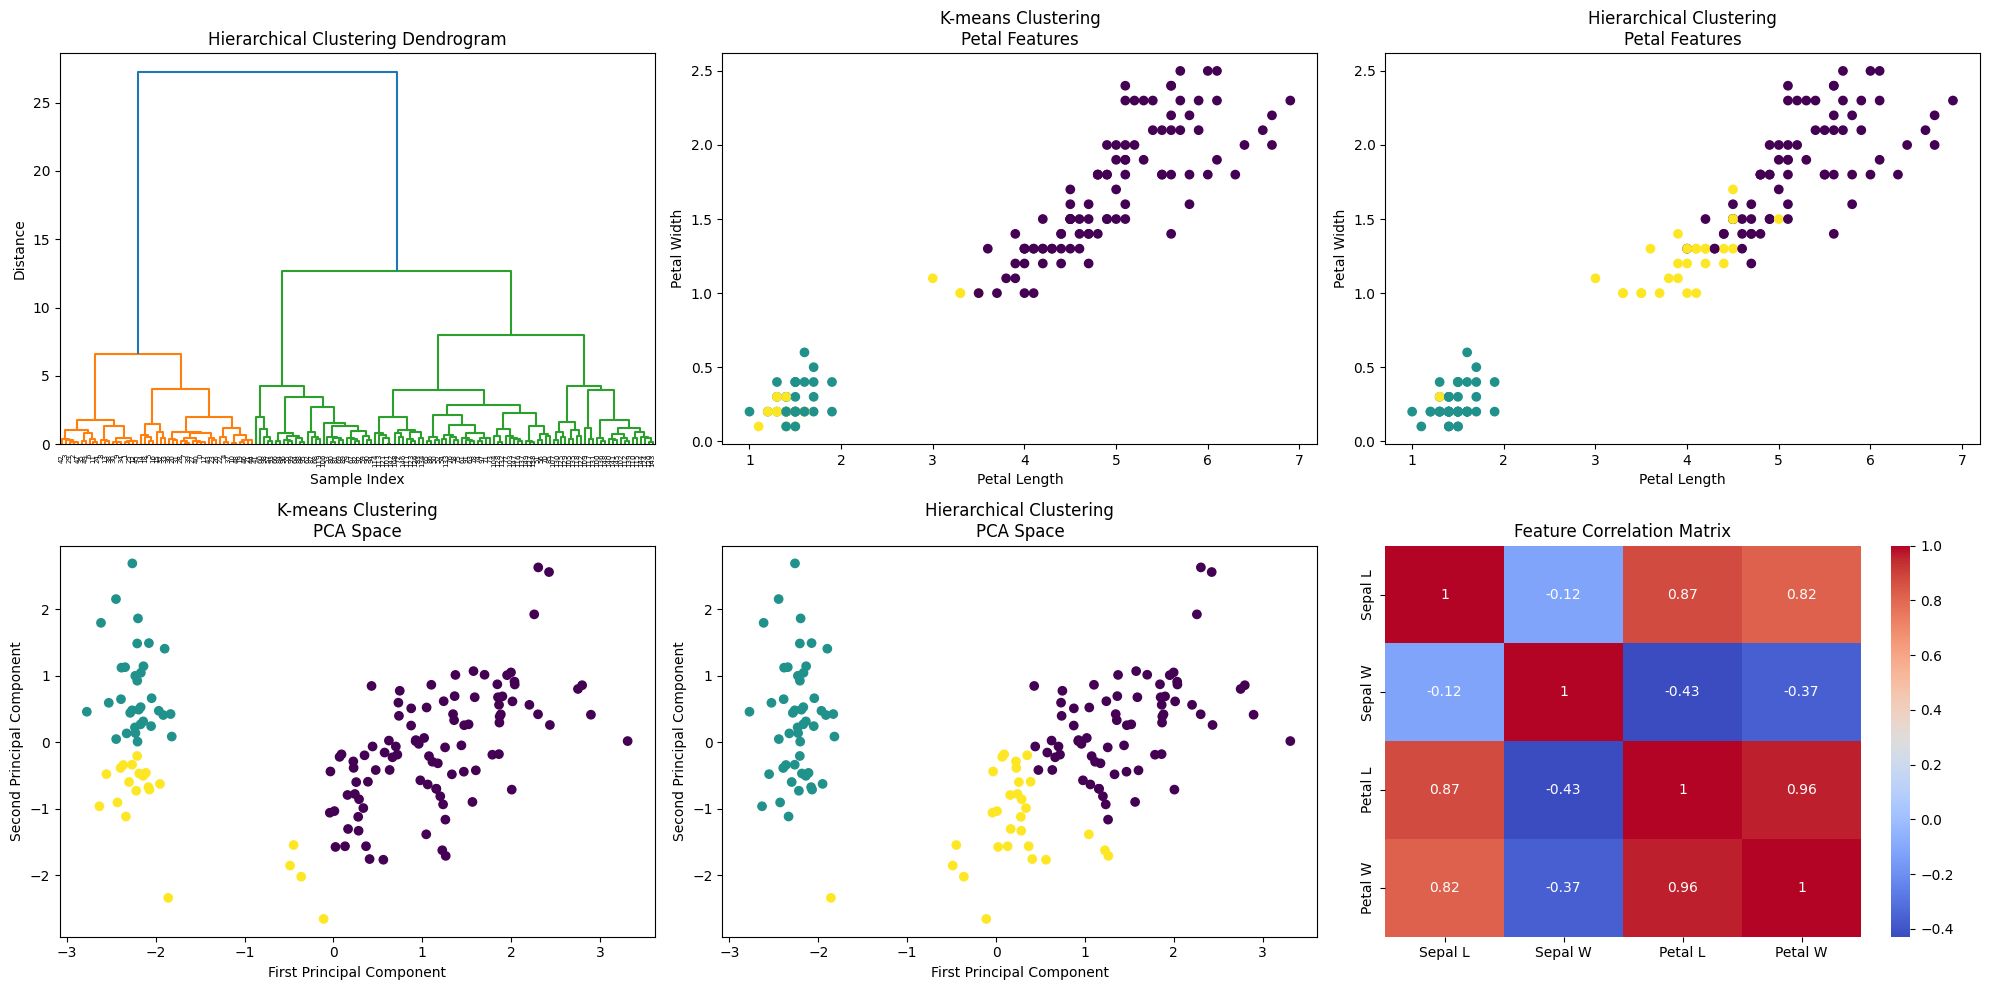

<Figure size 1000x700 with 0 Axes>

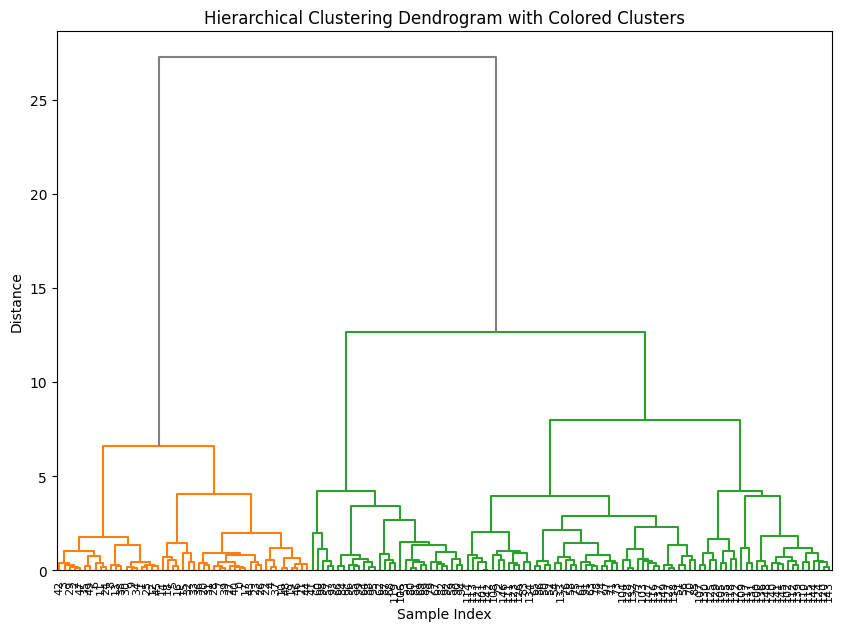

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Calculate linkage matrix for dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

# Create figure with subplots
plt.figure(figsize=(20, 10))

# Plot 1: Dendrogram
plt.subplot(231)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Plot 2: K-means clustering on original features
plt.subplot(232)
plt.scatter(X[:, 2], X[:, 3], c=kmeans_labels, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-means Clustering\nPetal Features')

# Plot 3: Hierarchical clustering on original features
plt.subplot(233)
plt.scatter(X[:, 2], X[:, 3], c=hierarchical_labels, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Hierarchical Clustering\nPetal Features')

# Plot 4: PCA with k-means clusters
plt.subplot(234)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering\nPCA Space')

# Plot 5: PCA with hierarchical clusters
plt.subplot(235)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Hierarchical Clustering\nPCA Space')

# Plot 6: Heatmap of feature correlations
plt.subplot(236)
correlation_matrix = np.corrcoef(X.T)
sns.heatmap(correlation_matrix, 
            xticklabels=['Sepal L', 'Sepal W', 'Petal L', 'Petal W'],
            yticklabels=['Sepal L', 'Sepal W', 'Petal L', 'Petal W'],
            annot=True, 
            cmap='coolwarm')
plt.title('Feature Correlation Matrix')

plt.tight_layout()

# Print analysis results
print("\nPCA Explained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f}")
print(f"Cumulative: {np.sum(pca.explained_variance_ratio_):.3f}")

# Compare clustering methods
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Calculate metrics for both clustering methods
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
ari_hierarchical = adjusted_rand_score(y, hierarchical_labels)

print("\nClustering Performance Metrics:")
print("\nK-means Clustering:")
print(f"Silhouette Score: {silhouette_kmeans:.3f}")
print(f"Adjusted Rand Index: {ari_kmeans:.3f}")
print("\nHierarchical Clustering:")
print(f"Silhouette Score: {silhouette_hierarchical:.3f}")
print(f"Adjusted Rand Index: {ari_hierarchical:.3f}")

# Function to calculate cluster characteristics
def print_cluster_stats(X, labels, method_name):
    print(f"\n{method_name} Cluster Statistics:")
    for i in range(max(labels) + 1):
        cluster_points = X[labels == i]
        print(f"\nCluster {i}:")
        print(f"Size: {len(cluster_points)}")
        print("Mean values:")
        for j, feature in enumerate(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']):
            print(f"{feature}: {cluster_points[:, j].mean():.2f} ± {cluster_points[:, j].std():.2f}")

# Print cluster statistics
print_cluster_stats(X, kmeans_labels, "K-means")
print_cluster_stats(X, hierarchical_labels, "Hierarchical")

plt.show()

# Additional visualization: Dendrogram with colored clusters
plt.figure(figsize=(10, 7))
def plot_dendrogram_with_clusters(linkage_matrix, labels):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, 
              leaf_rotation=90,
              leaf_font_size=8,
              color_threshold=0.7*max(linkage_matrix[:,2]),
              above_threshold_color='grey')
    plt.title('Hierarchical Clustering Dendrogram with Colored Clusters')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram_with_clusters(linkage_matrix, hierarchical_labels)